<a href="https://colab.research.google.com/github/ericabgraboyes/project4_team1/blob/kevin/Bank_Customer_Churn_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

In [1]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 11.6 MB/s eta 0:00:00


In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf


churn_df = pd.read_csv('https://raw.githubusercontent.com/ericabgraboyes/project4_team1/main/Customer-Churn-Records-clean.csv')

churn_df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [3]:
# # Drop the non-beneficial ID CustomerId, 'Surname' and 'RowNumber'.

churn_df = churn_df.drop(columns=['Complain'])

churn_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425


In [4]:
# Determine the number of unique values in each column.
churn_df.nunique()

CreditScore            460
Geography                3
Gender                   2
Age                     70
Tenure                  11
Balance               6382
NumOfProducts            4
HasCrCard                2
IsActiveMember           2
EstimatedSalary       9999
Exited                   2
Satisfaction Score       5
Card Type                4
Point Earned           785
dtype: int64

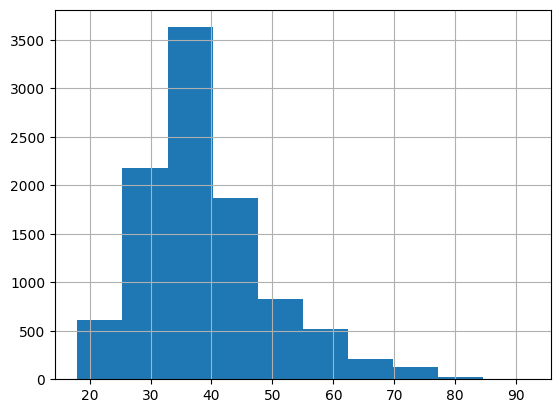

In [ ]:
hist = churn_df['Age'].hist(bins=10)

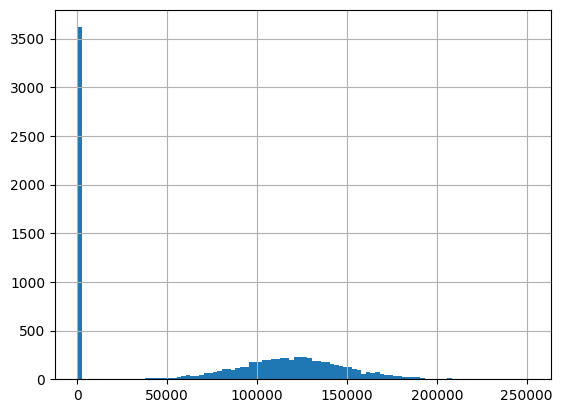

In [ ]:
hist = churn_df['Balance'].hist(bins=100)

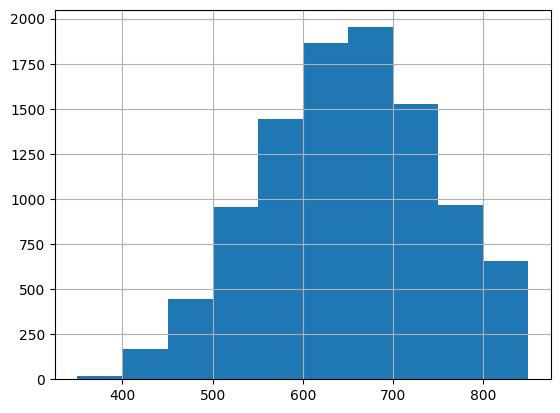

In [ ]:
hist = churn_df['CreditScore'].hist(bins=10)

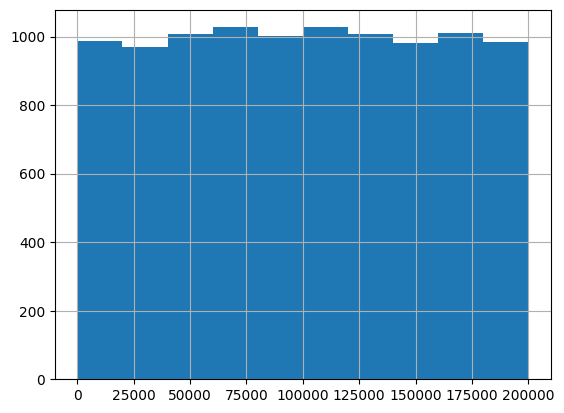

In [ ]:
hist = churn_df['EstimatedSalary'].hist(bins=10)

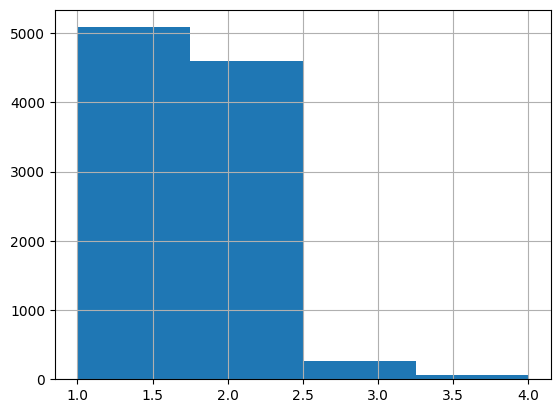

In [ ]:
hist = churn_df['NumOfProducts'].hist(bins=4)

In [5]:
# Convert categorical data to numeric with `pd.get_dummies`

categories_encoded = pd.get_dummies(churn_df, columns=['Gender','Geography','Card Type'])

categories_encoded.head()



,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Point Earned,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,2,464,1,0,1,0,0,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,3,456,1,0,0,0,1,1,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,3,377,1,0,1,0,0,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,5,350,1,0,1,0,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,5,425,1,0,0,0,1,0,1,0,0


In [6]:
categories_encoded.nunique()

CreditScore            460
Age                     70
Tenure                  11
Balance               6382
NumOfProducts            4
HasCrCard                2
IsActiveMember           2
EstimatedSalary       9999
Exited                   2
Satisfaction Score       5
Point Earned           785
Gender_Female            2
Gender_Male              2
Geography_France         2
Geography_Germany        2
Geography_Spain          2
Card Type_DIAMOND        2
Card Type_GOLD           2
Card Type_PLATINUM       2
Card Type_SILVER         2
dtype: int64

In [7]:
# Split our preprocessed data into our features and target arrays
y = categories_encoded["Exited"]
X= categories_encoded.drop(['Exited'],axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [8]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Optimize the Model


In [ ]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()
    features = len(X_train_scaled[0])


    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['tanh', 'relu', 'sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=100,
        max_value=500,
        step=2), activation=activation, input_dim=features))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=100,
            max_value=500,
            step=2),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [ ]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="accuracy",
    max_epochs=15,
    hyperband_iterations=5,
    overwrite=True)

# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=4,validation_data=(X_test_scaled,y_test))

Trial 150 Complete [00h 00m 44s]
accuracy: 0.9187999963760376

Best accuracy So Far: 0.9416000247001648
Total elapsed time: 00h 40m 45s


In [ ]:
# Return the top 3 models to test
top_hyper = tuner.get_best_hyperparameters(3)
for param in top_hyper:
  print(param.values)

{'activation': 'relu', 'first_units': 166, 'num_layers': 3, 'units_0': 326, 'units_1': 362, 'units_2': 330, 'units_3': 464, 'units_4': 474, 'tuner/epochs': 15, 'tuner/initial_epoch': 5, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0141'}
{'activation': 'relu', 'first_units': 186, 'num_layers': 3, 'units_0': 358, 'units_1': 368, 'units_2': 382, 'units_3': 116, 'units_4': 104, 'tuner/epochs': 15, 'tuner/initial_epoch': 5, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0014'}
{'activation': 'relu', 'first_units': 104, 'num_layers': 2, 'units_0': 424, 'units_1': 306, 'units_2': 108, 'units_3': 154, 'units_4': 306, 'tuner/epochs': 15, 'tuner/initial_epoch': 5, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0050'}


## Compile, Train and Evaluate Model 1




In [9]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
features = len(X_train_scaled[0])
layer1 = 326
layer2 = 362
layer3 = 330
# layer4 = 50
# layer5 = 225

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=layer1, activation="relu", input_dim=features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=layer2, activation="relu"))

# # Third hidden layer
# nn.add(tf.keras.layers.Dense(units=layer3, activation="tanh"))

# # Fourth hidden layer
# nn.add(tf.keras.layers.Dense(units=layer4, activation="tanh"))

# # Fifth hidden layer
# nn.add(tf.keras.layers.Dense(units=layer5, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 326)               6520      
                                                                 
 dense_1 (Dense)             (None, 362)               118374    
                                                                 
 dense_2 (Dense)             (None, 1)                 363       
                                                                 
Total params: 125,257
Trainable params: 125,257
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [11]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
235/235 [==============================] - 2s 4ms/step - loss: 0.4095 - accuracy: 0.8264
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3525 - accuracy: 0.8560
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3385 - accuracy: 0.8603
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3292 - accuracy: 0.8668
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3233 - accuracy: 0.8696
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3128 - accuracy: 0.8741
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3076 - accuracy: 0.8739
Epoch 8/100
235/235 [==============================] - 1s 4ms/step - loss: 0.2969 - accuracy: 0.8771
Epoch 9/100
235/235 [==============================] - 1s 4ms/step - loss: 0.2924 - accuracy: 0.8809
Epoch 10/100
235/235 [==============================] - 1s 6ms/step - loss: 0.2836 - accura

In [12]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

79/79 - 0s - loss: 1.3974 - accuracy: 0.8272 - 272ms/epoch - 3ms/step
Loss: 1.397402286529541, Accuracy: 0.8271999955177307


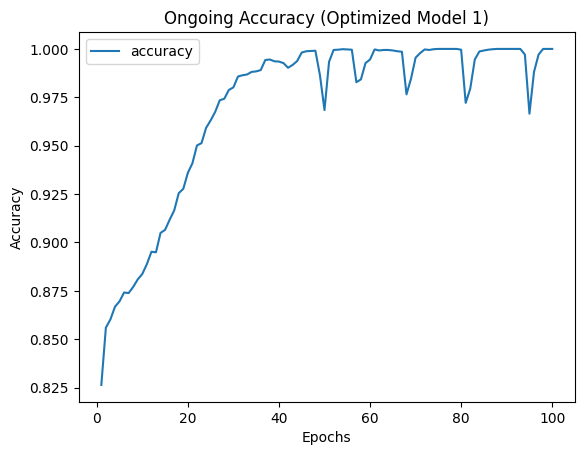

In [13]:
# Plot the ongoing accuracy over the epochs
accuracy_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
plot = accuracy_df.plot(xlabel = 'Epochs', ylabel='Accuracy', y = 'accuracy', title='Ongoing Accuracy (Optimized Model 1)')
fig = plot.get_figure()

In [15]:
from sklearn.metrics import classification_report
import numpy as np

y_pred = nn.predict(X_test_scaled, batch_size=64, verbose=0)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1974
           1       0.00      0.00      0.00       526

    accuracy                           0.79      2500
   macro avg       0.39      0.50      0.44      2500
weighted avg       0.62      0.79      0.70      2500



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
